<a href="https://colab.research.google.com/github/agungtriu/Belajar-Machine-Learning-untuk-Pemula/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-09 07:09:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.74MB/s    in 80s     

2020-07-09 07:10:44 (3.83 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dir):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
import pandas as pd
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
paper            712
rock             726
rps-cv-images      1
scissors         750
dtype: int64

In [ ]:
df = df.set_index("tag")
df = df.drop("rps-cv-images", axis=0)
df = df.reset_index()
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df['path']
y = df['tag']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=300)

df_tr = pd.DataFrame({'path':X_train, 'tag':y_train, 'set':'train'})
df_val = pd.DataFrame({'path':X_val, 'tag':y_val, 'set':'validation'})

print('train size', len(df_tr))
print('val size', len(df_val))

df_all = df_tr.append([df_val]).reset_index(drop=1)
print(df_all.groupby(['set','tag']).size(),'\n')

df_all.sample(3)

train size 1750
val size 438
set         tag     
train       paper       569
            rock        573
            scissors    608
validation  paper       143
            rock        153
            scissors    142
dtype: int64 



,path,tag,set
162,/tmp/rockpaperscissors/rps-cv-images/rock/m7OF...,rock,train
544,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
77,/tmp/rockpaperscissors/rps-cv-images/paper/M4h...,paper,train


In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

datasource_path = "/tmp/rockpaperscissors/"
dataset_path = "/tmp/dataset_rockpaperscissors/"

for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
train_dir = os.path.join(dataset_path, 'train')
validation_dir = os.path.join(dataset_path, 'validation')

In [ ]:
os.listdir(train_dir)

['paper', 'rock', 'scissors']

In [ ]:
os.listdir(validation_dir)

['paper', 'rock', 'scissors']

In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 300),
        batch_size=4,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 300),
        batch_size=4,
        class_mode='categorical')

Found 1750 images belonging to 3 classes.
Found 438 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), strides=(2, 2), padding='same', activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 100, 150, 32)      896       
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 25, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 12, 19, 64)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 6, 10, 128)        73856     
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 3, 5, 128)         0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 1920)            

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2,
      callbacks=[rlrop])

Epoch 1/20
25/25 - 4s - loss: 1.1989 - accuracy: 0.2900 - val_loss: 1.0862 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
25/25 - 4s - loss: 1.1077 - accuracy: 0.3700 - val_loss: 1.0810 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 3/20
25/25 - 3s - loss: 1.1118 - accuracy: 0.3500 - val_loss: 1.0891 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/20
25/25 - 3s - loss: 1.1111 - accuracy: 0.4100 - val_loss: 1.0639 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/20
25/25 - 3s - loss: 0.9977 - accuracy: 0.5400 - val_loss: 1.3772 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 6/20
25/25 - 3s - loss: 0.9087 - accuracy: 0.5400 - val_loss: 0.7595 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 7/20
25/25 - 3s - loss: 0.8850 - accuracy: 0.6122 - val_loss: 0.5692 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 8/20
25/25 - 3s - loss: 0.6340 - accuracy: 0.7500 - val_loss: 0.6306 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 9/20
25/25 - 3s - loss: 0.6732 - accuracy: 0.7000 - val_loss: 0.6339 - val_accuracy: 0.8333 - lr: 0.0010
E

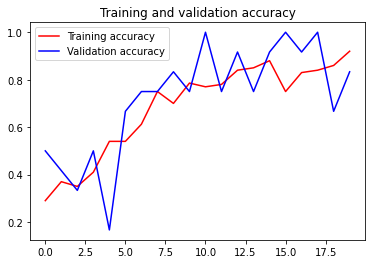

<Figure size 432x288 with 0 Axes>

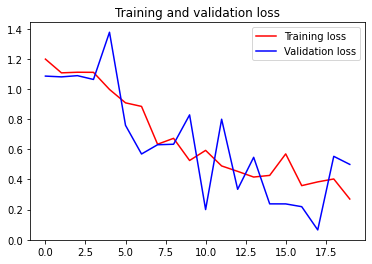

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving IMG_20200708_180641.jpg to IMG_20200708_180641.jpg
IMG_20200708_180641.jpg
scissors


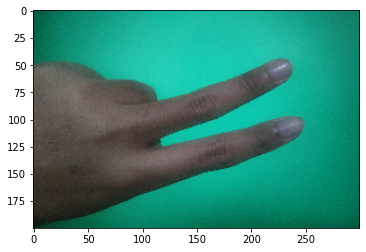

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  result=np.argmax(classes)
  
  print(fn)
  if result==0:
    print('paper')
  elif result==1:
    print('rock')
  elif result==2:
    print('scissors')